In [44]:
library(ggplot2)
library(corrplot)
library(ggpubr)

In [15]:
df <- read.csv('../data/winequality-white.csv')

In [16]:
head(df)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,7.0,0.27,0.36,20.7,45.00,45,170,1001.0000,3.00,0.45,8.8,6
2,6.3,0.30,0.34,1.6,49.00,14,132,994.0000,3.30,0.49,9.5,6
3,8.1,0.28,0.40,6.9,0.05,30,97,0.9951,3.26,0.44,10.1,6
4,7.2,0.23,0.32,8.5,58.00,47,186,0.9956,3.19,0.40,9.9,6
5,7.2,0.23,0.32,8.5,58.00,47,186,0.9956,3.19,0.40,9.9,6
6,8.1,0.28,0.40,6.9,0.05,30,97,0.9951,3.26,0.44,10.1,6


In [17]:
summary(df)

 fixed.acidity    volatile.acidity   citric.acid     residual.sugar  
 Min.   : 3.800   Min.   :   0.08   Min.   :0.0000   Min.   : 0.600  
 1st Qu.: 6.300   1st Qu.:   0.21   1st Qu.:0.2700   1st Qu.: 1.700  
 Median : 6.800   Median :   0.27   Median :0.3200   Median : 5.200  
 Mean   : 6.855   Mean   :  11.42   Mean   :0.3342   Mean   : 6.391  
 3rd Qu.: 7.300   3rd Qu.:   0.33   3rd Qu.:0.3900   3rd Qu.: 9.900  
 Max.   :14.200   Max.   :1005.00   Max.   :1.6600   Max.   :65.800  
   chlorides      free.sulfur.dioxide total.sulfur.dioxide    density         
 Min.   :  0.02   Min.   :  2.00      Min.   :  9.0        Min.   :   0.9871  
 1st Qu.: 33.00   1st Qu.: 23.00      1st Qu.:108.0        1st Qu.:   0.9918  
 Median : 41.00   Median : 34.00      Median :134.0        Median :   0.9941  
 Mean   : 40.61   Mean   : 35.31      Mean   :138.4        Mean   :  63.4485  
 3rd Qu.: 48.00   3rd Qu.: 46.00      3rd Qu.:167.0        3rd Qu.:   0.9968  
 Max.   :346.00   Max.   :289.00    

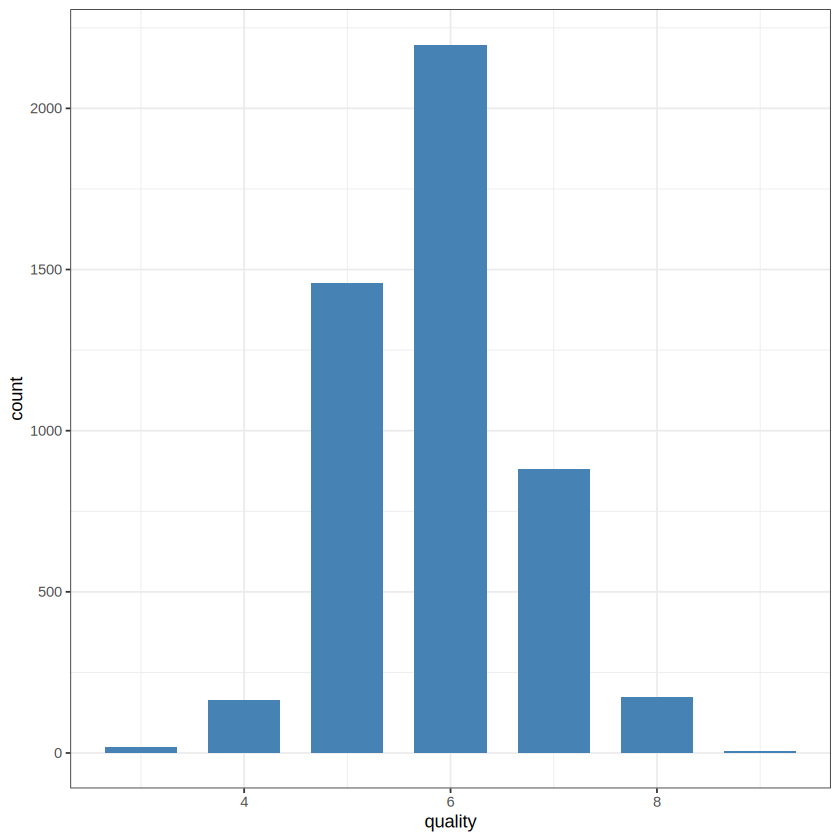

In [18]:
ggplot(df, aes(x = quality)) +
    geom_bar(stat = 'count', width = 0.7, fill = 'steelblue') + theme_bw()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
fixed.acidity,1.00,-0.10,0.29,0.09,0.01,-0.05,0.09,0.08,-0.43,-0.02,-0.12,-0.11
volatile.acidity,-0.10,1.00,-0.10,0.00,0.02,-0.05,-0.03,0.02,0.06,0.00,-0.02,-0.07
citric.acid,0.29,-0.10,1.00,0.09,0.10,0.09,0.12,0.01,-0.16,0.06,-0.08,-0.01
residual.sugar,0.09,0.00,0.09,1.00,0.07,0.30,0.40,-0.02,-0.19,-0.03,-0.45,-0.10
chlorides,0.01,0.02,0.10,0.07,1.00,0.10,0.16,-0.02,-0.06,0.03,-0.28,-0.15
free.sulfur.dioxide,-0.05,-0.05,0.09,0.30,0.10,1.00,0.62,-0.03,0.00,0.06,-0.25,0.01
total.sulfur.dioxide,0.09,-0.03,0.12,0.40,0.16,0.62,1.00,-0.01,0.00,0.13,-0.45,-0.17
density,0.08,0.02,0.01,-0.02,-0.02,-0.03,-0.01,1.00,0.00,0.01,-0.02,0.00
pH,-0.43,0.06,-0.16,-0.19,-0.06,0.00,0.00,0.00,1.00,0.16,0.12,0.10
sulphates,-0.02,0.00,0.06,-0.03,0.03,0.06,0.13,0.01,0.16,1.00,-0.02,0.05


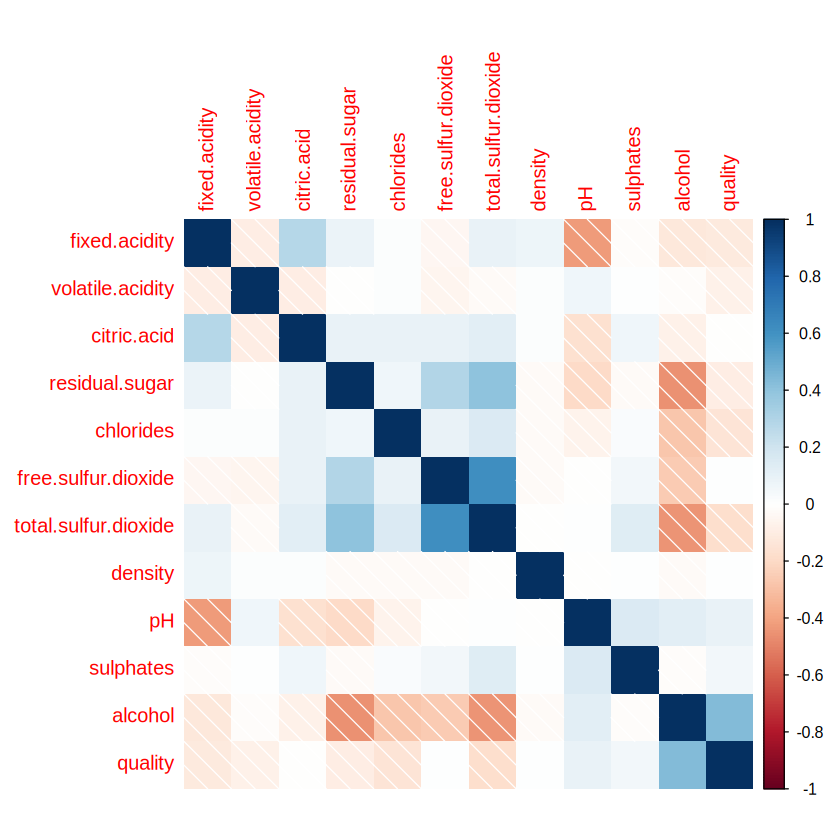

In [23]:
corrplot(cor(df), method = 'shade')
round(cor(df), 2)

### - Alcohol

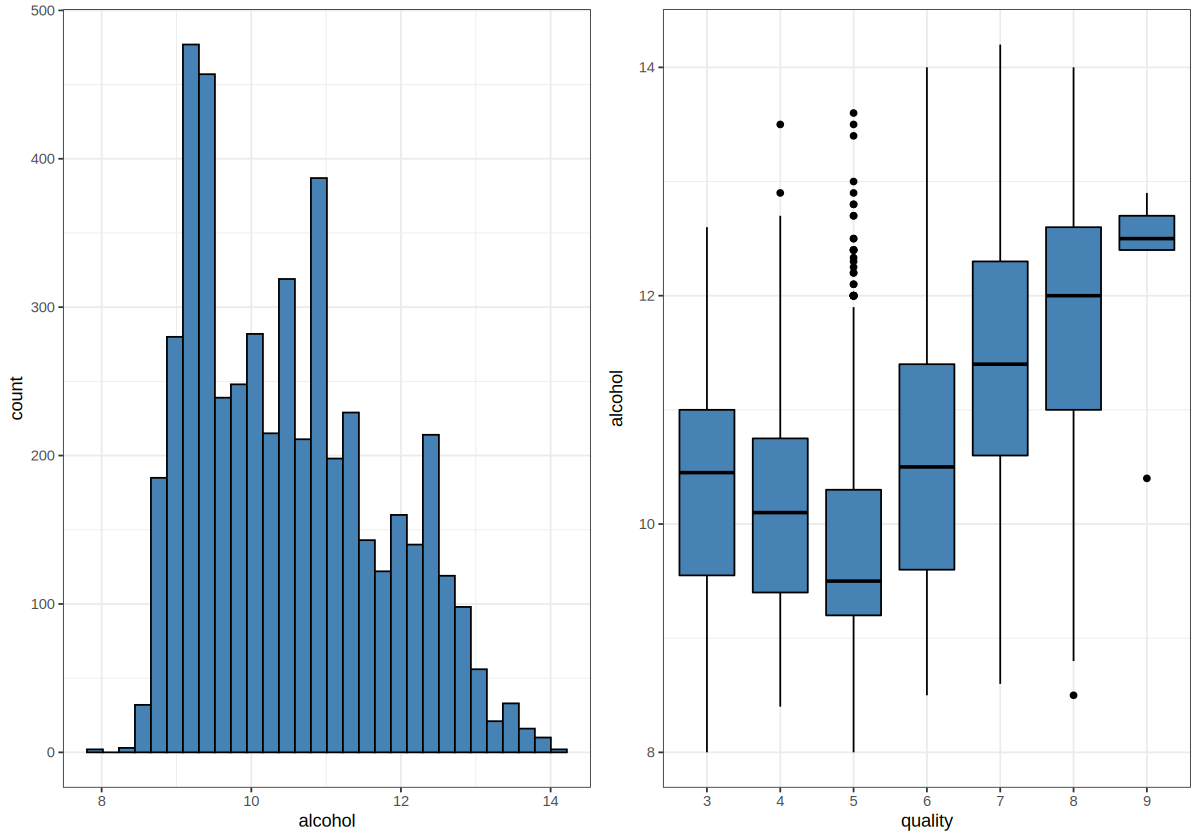

In [48]:
options(repr.plot.width = 10, repr.plot.height = 7)
ggarrange(
    ggplot(data = df, aes(x = alcohol)) + 
        geom_histogram(position = 'identity', bins = 30, 
                   color = 'black', fill = 'steelblue') + 
        theme_bw(),
    ggplot(data = df, aes(x = factor(quality), y = alcohol)) +
        geom_boxplot(color = 'black', fill = 'steelblue') +
        theme_bw() + labs(x = 'quality'),
    ncol = 2, nrow = 1, align = 'hv'
)

### - Density

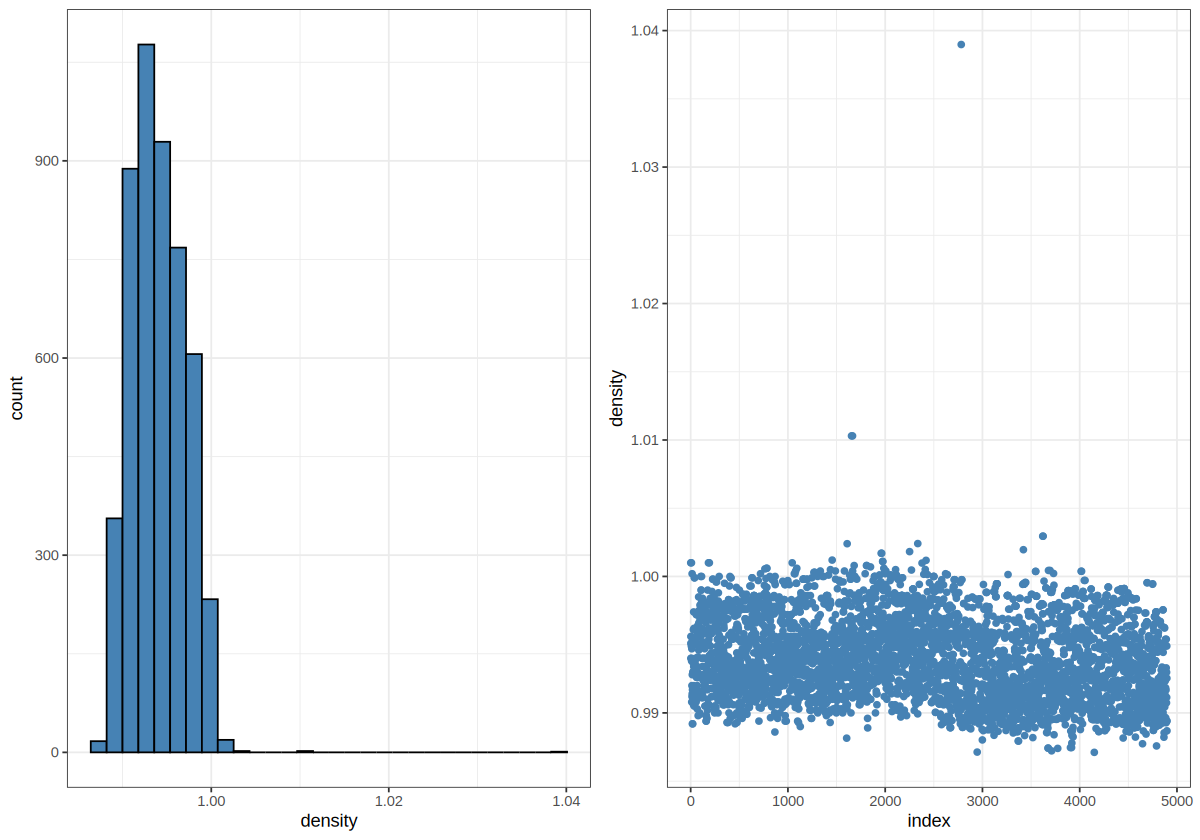

In [63]:
#### Eliminados los outliers, corregidos
ggarrange(
    ggplot(data = df, aes(x = density)) + 
        geom_histogram(position = 'identity', bins = 30, 
                   color = 'black', fill = 'steelblue') + 
        theme_bw(),
    ggplot(data = df, aes(x = 1:nrow(df), y = density)) +
        geom_point(color = 'steelblue') +
        theme_bw() + labs(x = 'index'),
    ncol = 2, nrow = 1, align = 'hv'
)

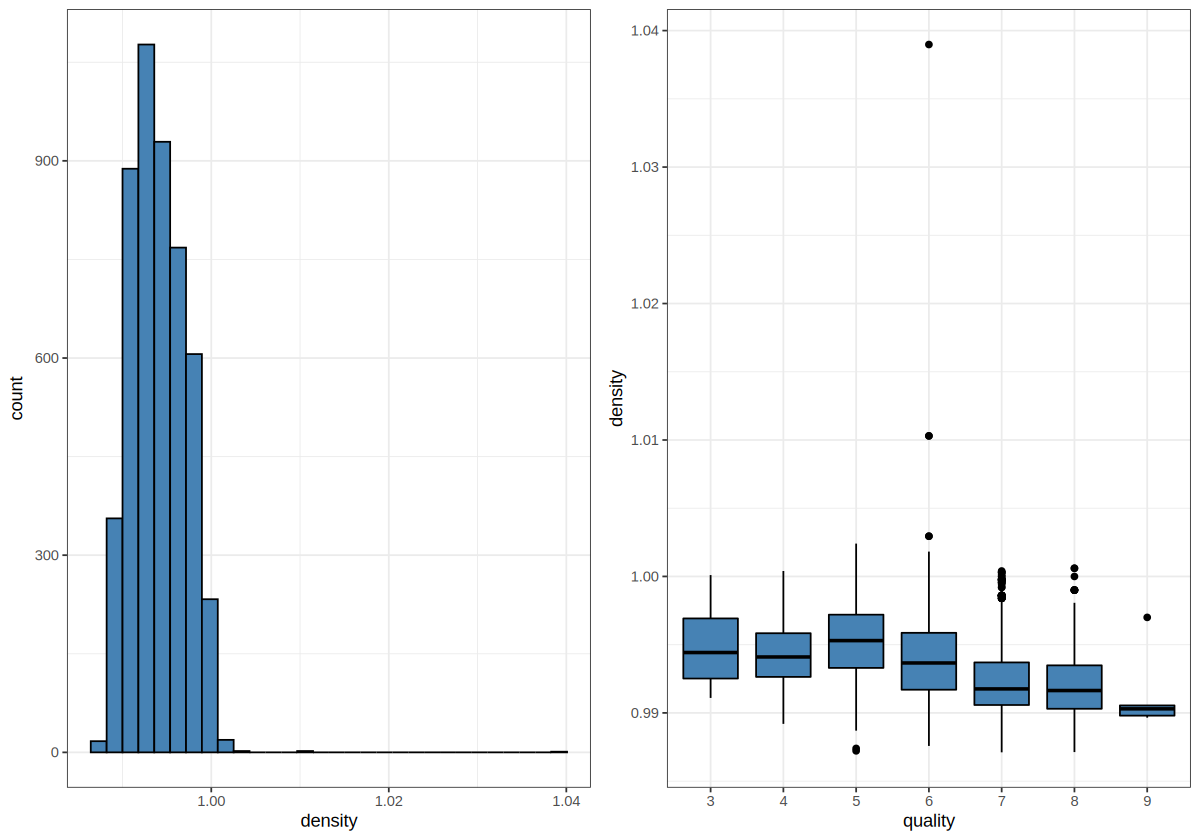

In [65]:
ggarrange(
    ggplot(data = df, aes(x = density)) + 
        geom_histogram(position = 'identity', bins = 30, 
                   color = 'black', fill = 'steelblue') + 
        theme_bw(),
    ggplot(data = df, aes(x = factor(quality), y = density)) +
        geom_boxplot(color = 'black', fill = 'steelblue') +
        theme_bw() + labs(x = 'quality'),
    ncol = 2, nrow = 1, align = 'hv'
)